In [2]:
import numpy as np
import pandas as pd 
import cmath 
import scipy.special as sp
import scipy.constants as const
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
plt.rcParams['legend.facecolor'] = 'white'

In [15]:
# from this point forward, understanding is that tan delta = 0 (zero loss scenario) 
p1p19_LN2 = pd.read_csv('/Users/leayamashiro/AliCPT/whispering_gallery/S21_csvs/S11_S21_real/REAL_0.1to0.19mm_GapSweep_LN2_tanDelta0_3.3875GHz.csv', skiprows=4)
p2p5_LN2 = pd.read_csv('/Users/leayamashiro/AliCPT/whispering_gallery/S21_csvs/S11_S21_real/REAL_0.2to0.5mm_GapSweep_LN2_tanDelta0_3.3875.csv', skiprows=4)

In [28]:
LN2_td0 = pd.concat([p1p19_LN2, p2p5_LN2])

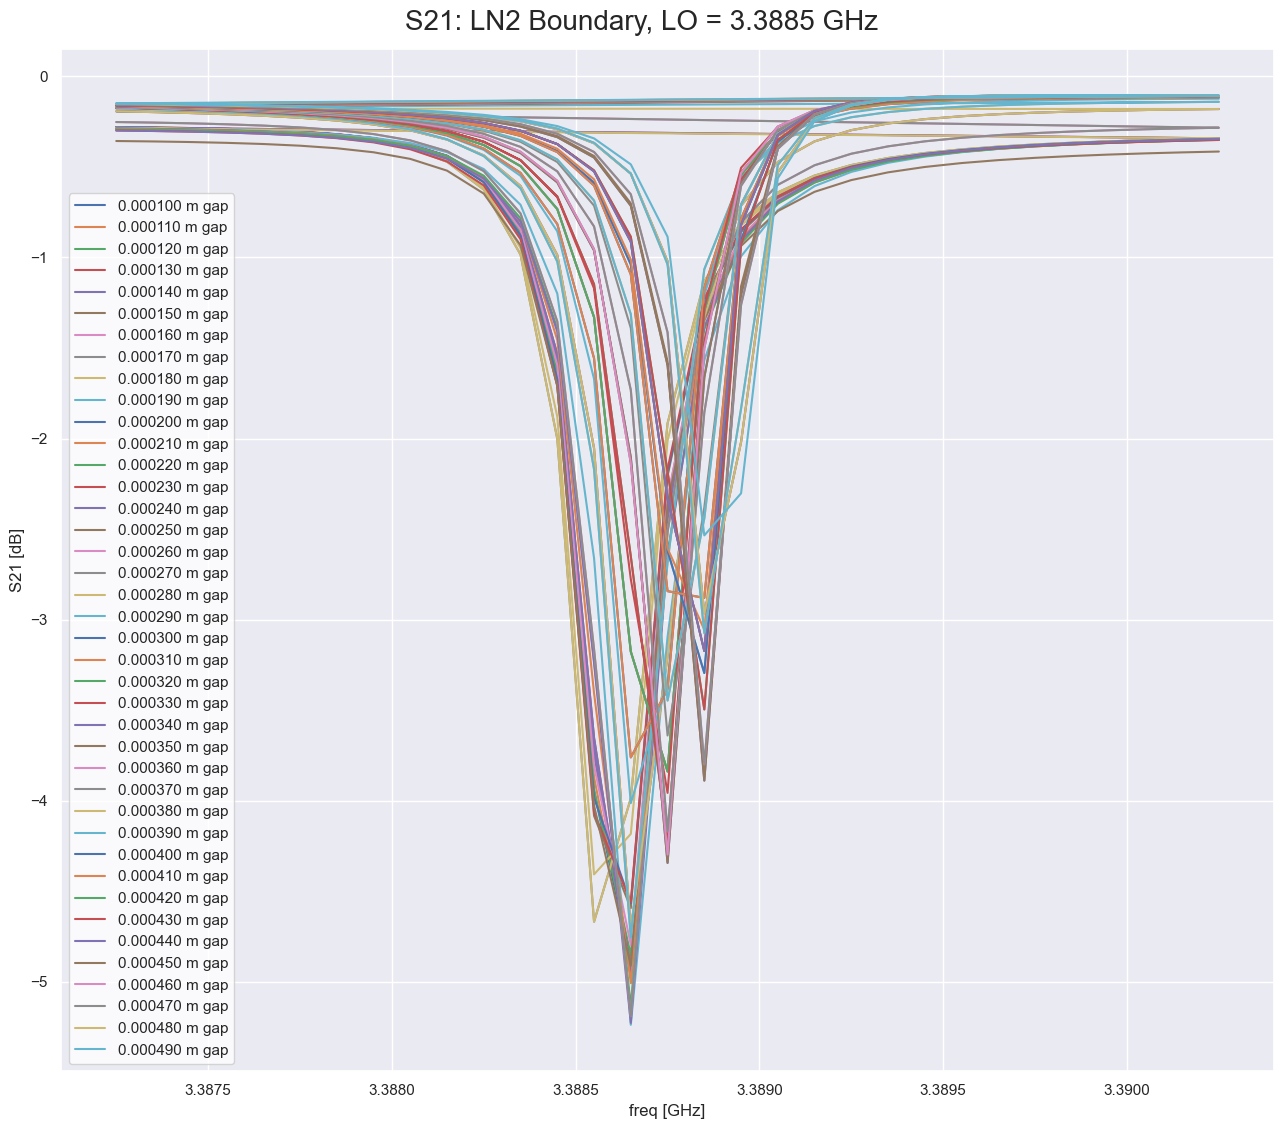

In [26]:
fig, ax = plt.subplots(1,1, figsize = (13,11.5))

#isin(LN2_range['freq (GHz)'])]

for i in np.arange(0.0001, 0.0002, 0.00001): 
    gap_sep_LN21 = p1p19_LN2[(p1p19_LN2['% x_strip (m)'] > i - 0.00001) & (p1p19_LN2['% x_strip (m)'] < i + 0.00001)]
    ax.plot(gap_sep_LN21['freq (GHz)'], gap_sep_LN21['S21 (1)'], label=f"{i:.6f} m gap")
for j in np.arange(0.0002, 0.0005, 0.00001): 
    gap_sep_LN22 = p2p5_LN2[(p2p5_LN2['% x_strip (m)'] > j - 0.00001) & (p2p5_LN2['% x_strip (m)'] < j + 0.00001)]
    ax.plot(gap_sep_LN22['freq (GHz)'], gap_sep_LN22['S21 (1)'], label=f"{j:.6f} m gap")
ax.legend()
#ax[0].set_title('Air Boundary')
plt.setp(ax, xlabel = 'freq [GHz]', ylabel = 'S21 [dB]')
plt.suptitle('S21: LN2 Boundary, LO = 3.3885 GHz', fontsize = 20)
plt.tight_layout()

In [27]:
def separate_p1_2(df):
    df['% x_strip (m)'] = df['% x_strip (m)'].round(5)  # to normalize float precision
    unique_vals = sorted(df['% x_strip (m)'].unique())
    
    chunks = []
    for val in unique_vals:
        subset = df[df['% x_strip (m)'] == val]
        chunks.append(subset)
    
    return chunks

In [55]:
def separate_p1_2_loc_3_27(df):
    df['% x_strip (m)'] = df['% x_strip (m)'].round(5)  # to normalize float precision
    unique_vals = sorted(df['% x_strip (m)'].unique())
    
    chunks = []
    for val in unique_vals:
        subset = df[df['% x_strip (m)'] == val].reset_index(drop=True)
        sub_indexed = subset.loc[3:27]
        chunks.append(sub_indexed)
    
    return chunks

In [61]:
def separate_gaps_transform_index(df, index_start, index_stop):
    df['% x_strip (m)'] = df['% x_strip (m)'].round(5)  # to normalize float precision
    unique_vals = sorted(df['% x_strip (m)'].unique())
    
    chunks = []
    for val in unique_vals:
        subset = df[df['% x_strip (m)'] == val].reset_index(drop=True)
        sub_indexed = subset.loc[index_start:index_stop]
        chunks.append(sub_indexed)

    all_chunks_new = pd.concat(chunks)
    
    return all_chunks_new

In [56]:
gap_indexed = separate_p1_2_loc_3_27(LN2_td0)
len(gap_indexed)

41

In [70]:
general_index_transformer = separate_gaps_transform_index(LN2_td0, 4, 25)

In [71]:
general_index_transformer

,% x_strip (m),freq (GHz),S11 (1),S21 (1)
4,0.0001,3.38765,-18.536536,-0.296787
5,0.0001,3.38775,-19.074563,-0.306071
6,0.0001,3.38785,-19.791810,-0.320148
7,0.0001,3.38795,-20.789904,-0.342347
8,0.0001,3.38805,-22.245941,-0.379203
...,...,...,...,...
21,0.0005,3.38935,-36.575355,-0.128917
22,0.0005,3.38945,-31.757654,-0.115397
23,0.0005,3.38955,-29.482676,-0.109274
24,0.0005,3.38965,-28.124960,-0.106482


In [58]:
gap_indexed[1]

,% x_strip (m),freq (GHz),S11 (1),S21 (1)
3,0.00011,3.38755,-18.024579,-0.293001
4,0.00011,3.38765,-18.434674,-0.299348
5,0.00011,3.38775,-18.962288,-0.308669
6,0.00011,3.38785,-19.664466,-0.322776
7,0.00011,3.38795,-20.639328,-0.344984
8,0.00011,3.38805,-22.057832,-0.381776
9,0.00011,3.38815,-24.144826,-0.447126
10,0.00011,3.38825,-25.956253,-0.574877
11,0.00011,3.38835,-22.057520,-0.860646
12,0.00011,3.38845,-15.141754,-1.627039


In [59]:
indexed_concat_gaps = pd.concat(gap_indexed)

In [60]:
indexed_concat_gaps

,% x_strip (m),freq (GHz),S11 (1),S21 (1)
3,0.0001,3.38755,-18.118883,-0.290476
4,0.0001,3.38765,-18.536536,-0.296787
5,0.0001,3.38775,-19.074563,-0.306071
6,0.0001,3.38785,-19.791810,-0.320148
7,0.0001,3.38795,-20.789904,-0.342347
...,...,...,...,...
23,0.0005,3.38955,-29.482676,-0.109274
24,0.0005,3.38965,-28.124960,-0.106482
25,0.0005,3.38975,-27.214625,-0.105316
26,0.0005,3.38985,-26.558892,-0.104992


In [29]:
gap_separated = separate_p1_2(LN2_td0)

In [47]:
len(gap_separated[0])

31

In [48]:
gap_separated[0]

,% x_strip (m),freq (GHz),S11 (1),S21 (1)
0,0.0001,3.38725,-17.288002,-0.280750
1,0.0001,3.38735,-17.513805,-0.282981
2,0.0001,3.38745,-17.785662,-0.286087
3,0.0001,3.38755,-18.118883,-0.290476
4,0.0001,3.38765,-18.536536,-0.296787
5,0.0001,3.38775,-19.074563,-0.306071
6,0.0001,3.38785,-19.791810,-0.320148
7,0.0001,3.38795,-20.789904,-0.342347
8,0.0001,3.38805,-22.245941,-0.379203
9,0.0001,3.38815,-24.385597,-0.444825


In [49]:
gap_separated[0].loc[3:27]

,% x_strip (m),freq (GHz),S11 (1),S21 (1)
3,0.0001,3.38755,-18.118883,-0.290476
4,0.0001,3.38765,-18.536536,-0.296787
5,0.0001,3.38775,-19.074563,-0.306071
6,0.0001,3.38785,-19.791810,-0.320148
7,0.0001,3.38795,-20.789904,-0.342347
8,0.0001,3.38805,-22.245941,-0.379203
9,0.0001,3.38815,-24.385597,-0.444825
10,0.0001,3.38825,-26.104546,-0.573540
11,0.0001,3.38835,-21.893969,-0.862662
12,0.0001,3.38845,-14.960495,-1.643506


In [36]:
gap_separated

[    % x_strip (m)  freq (GHz)    S11 (1)   S21 (1)
 0          0.0001     3.38725 -17.288002 -0.280750
 1          0.0001     3.38735 -17.513805 -0.282981
 2          0.0001     3.38745 -17.785662 -0.286087
 3          0.0001     3.38755 -18.118883 -0.290476
 4          0.0001     3.38765 -18.536536 -0.296787
 5          0.0001     3.38775 -19.074563 -0.306071
 6          0.0001     3.38785 -19.791810 -0.320148
 7          0.0001     3.38795 -20.789904 -0.342347
 8          0.0001     3.38805 -22.245941 -0.379203
 9          0.0001     3.38815 -24.385597 -0.444825
 10         0.0001     3.38825 -26.104546 -0.573540
 11         0.0001     3.38835 -21.893969 -0.862662
 12         0.0001     3.38845 -14.960495 -1.643506
 13         0.0001     3.38855  -8.948843 -3.945843
 14         0.0001     3.38865  -6.324092 -4.901036
 15         0.0001     3.38875  -7.111420 -2.375271
 16         0.0001     3.38885  -8.433134 -1.319072
 17         0.0001     3.38895  -9.486768 -0.897059
 18         

In [38]:
heatmap_setup = LN2_td0.pivot_table(index='freq (GHz)', columns='% x_strip (m)', values='S21 (1)')

<Axes: xlabel='% x_strip (m)', ylabel='freq (GHz)'>

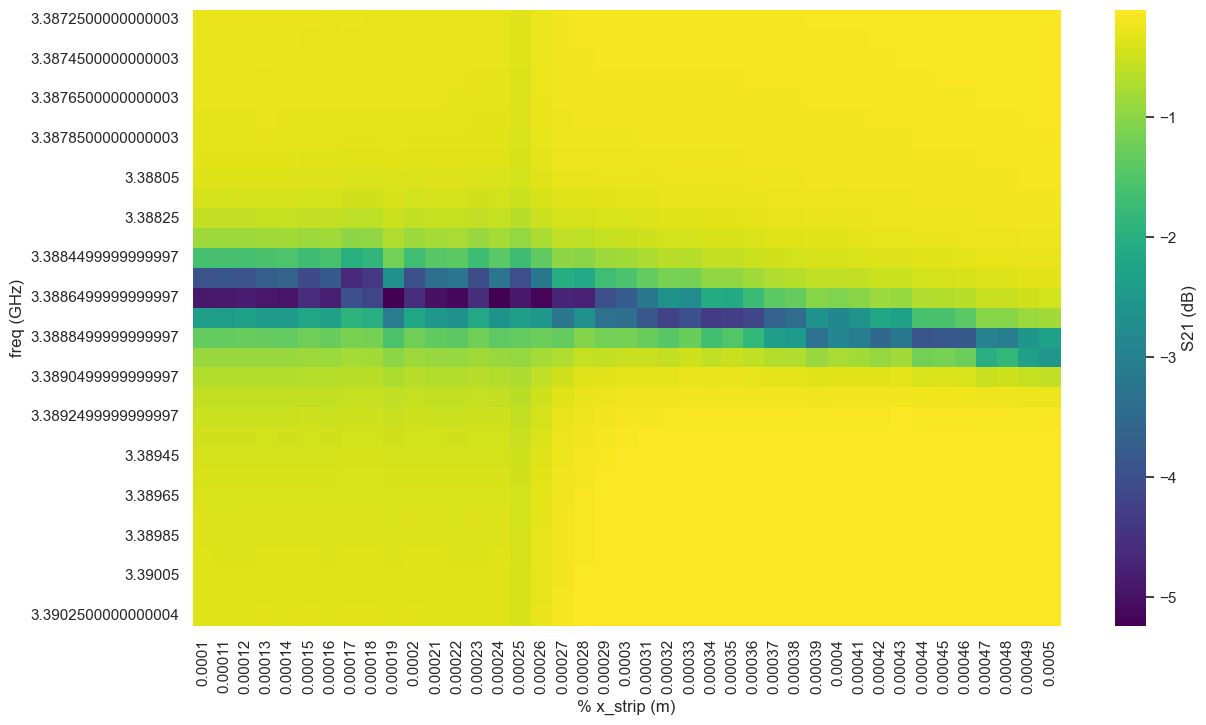

In [46]:
plt.figure(figsize=(14, 8))

# Make heatmap
sns.heatmap(
    heatmap_setup,
    cmap='viridis',      # or 'coolwarm', 'plasma', etc.
    cbar_kws={'label': 'S21 (dB)'},
    xticklabels=1,      # Control how many frequency ticks to show
    yticklabels=2       # Control how many x_strip ticks to show
)


In [93]:
general_index_transformed = general_index_transformer.sort_values('% x_strip (m)', ascending=True)
general_index_transformed

,% x_strip (m),freq (GHz),S11 (1),S21 (1)
4,0.0001,3.38765,-18.536536,-0.296787
25,0.0001,3.38975,-12.606807,-0.384143
24,0.0001,3.38965,-12.432393,-0.397541
23,0.0001,3.38955,-12.227306,-0.414829
22,0.0001,3.38945,-11.983078,-0.437767
...,...,...,...,...
5,0.0005,3.38775,-20.124869,-0.162366
4,0.0005,3.38765,-20.282700,-0.158263
24,0.0005,3.38965,-28.124960,-0.106482
13,0.0005,3.38855,-16.719885,-0.330530


In [76]:
heatmap_setup_freqchopped = general_index_transformer.pivot_table(index='% x_strip (m)', columns='freq (GHz)', values='S21 (1)')

<Axes: xlabel='freq (GHz)', ylabel='% x_strip (m)'>

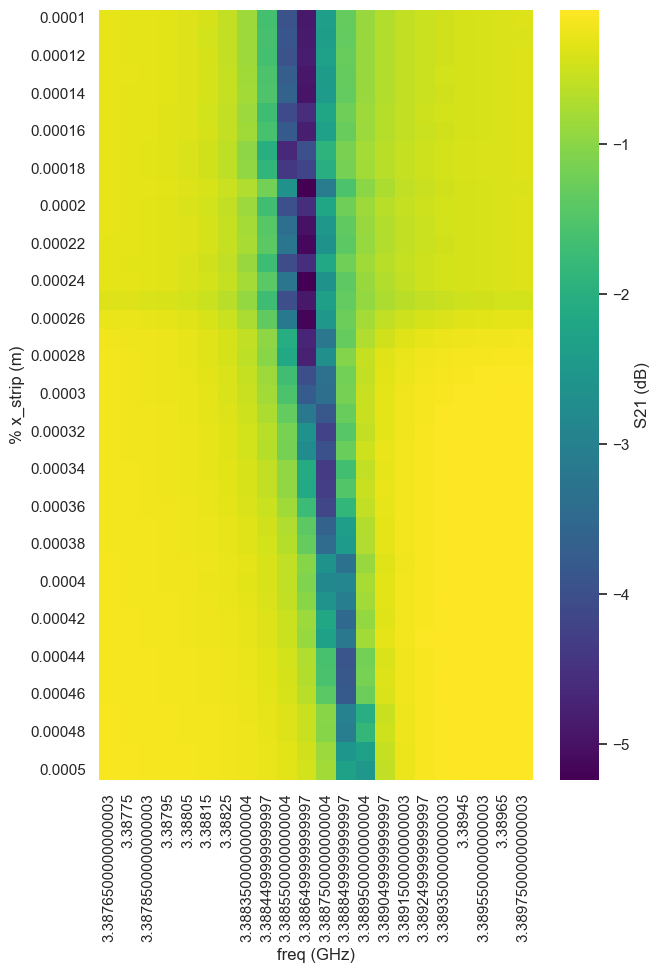

In [80]:
plt.figure(figsize=(7, 10))

# Make heatmap
sns.heatmap(
    heatmap_setup_freqchopped,
    cmap='viridis',      # or 'coolwarm', 'plasma', etc.
    cbar_kws={'label': 'S21 (dB)'},
    xticklabels=1,      # Control how many frequency ticks to show
    yticklabels=2       # Control how many x_strip ticks to show
)

In [96]:
heatmap_setup_gapreverse = general_index_transformed.pivot_table(index='% x_strip (m)', columns='freq (GHz)', values='S21 (1)')
heatmap_setup_gapreverse = heatmap_setup_gapreverse.sort_index(ascending=False)

<Axes: xlabel='freq (GHz)', ylabel='% x_strip (m)'>

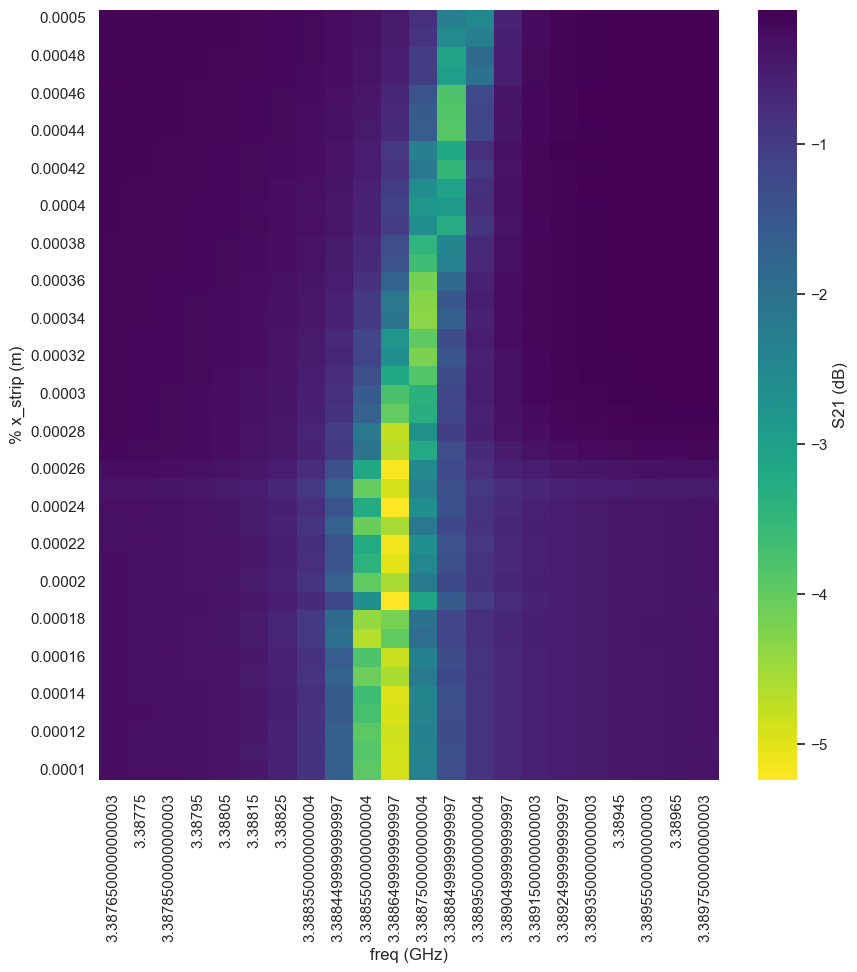

In [134]:
plt.figure(figsize=(10, 10))

# Make heatmap
sns.heatmap(
    heatmap_setup_gapreverse,
    cmap='viridis_r',      # or 'coolwarm', 'plasma', etc.
    cbar_kws={'label': 'S21 (dB)'},
    xticklabels=1,      # Control how many frequency ticks to show
    yticklabels=2       # Control how many x_strip ticks to show
)

### Now out to x_strip = 0.57 mm

In [120]:
# loading in 0.5 to 0.57 mm set
p5p57_LN2 = pd.read_csv('/Users/leayamashiro/AliCPT/whispering_gallery/S21_csvs/S11_S21_real/REAL_0.5to0.58_GapSweep_LN2_tandelta0_3.3875GHz.csv', skiprows=4)
p5p57_LN2[['% x_strip (m)', 'freq (GHz)']] = p5p57_LN2[['% x_strip (m)', 'freq (GHz)']].round(5)  # Normalize float precision
# apply function to chop the old dataset's frequency range to be same as new set
LN2_td0_chop = separate_gaps_transform_index(LN2_td0, 4, 26)
LN2_td0_chop[['% x_strip (m)', 'freq (GHz)']] = LN2_td0_chop[['% x_strip (m)', 'freq (GHz)']].round(5)
# make sure same length and freq range
print(len(p5p57_LN2[p5p57_LN2['% x_strip (m)']==0.00050]) == len(LN2_td0_chop[LN2_td0_chop['% x_strip (m)']==0.0001]))
print(min(LN2_td0_chop['freq (GHz)']) == min(p5p57_LN2['freq (GHz)']))
print(max(LN2_td0_chop['freq (GHz)']) == max(p5p57_LN2['freq (GHz)']))

True
True
True


In [121]:
# combining
p1p57_LN2 = pd.concat([LN2_td0_chop, p5p57_LN2])
p1p57_LN2

,% x_strip (m),freq (GHz),S11 (1),S21 (1)
4,0.00010,3.38765,-18.536536,-0.296787
5,0.00010,3.38775,-19.074563,-0.306071
6,0.00010,3.38785,-19.791810,-0.320148
7,0.00010,3.38795,-20.789904,-0.342347
8,0.00010,3.38805,-22.245941,-0.379203
...,...,...,...,...
179,0.00057,3.38945,-31.740763,-0.116472
180,0.00057,3.38955,-29.335912,-0.109162
181,0.00057,3.38965,-27.953434,-0.105939
182,0.00057,3.38975,-27.047600,-0.104604


Text(0.5, 1.0, 'Disk-Strip Coupling, LO = 3.38875 GHz')

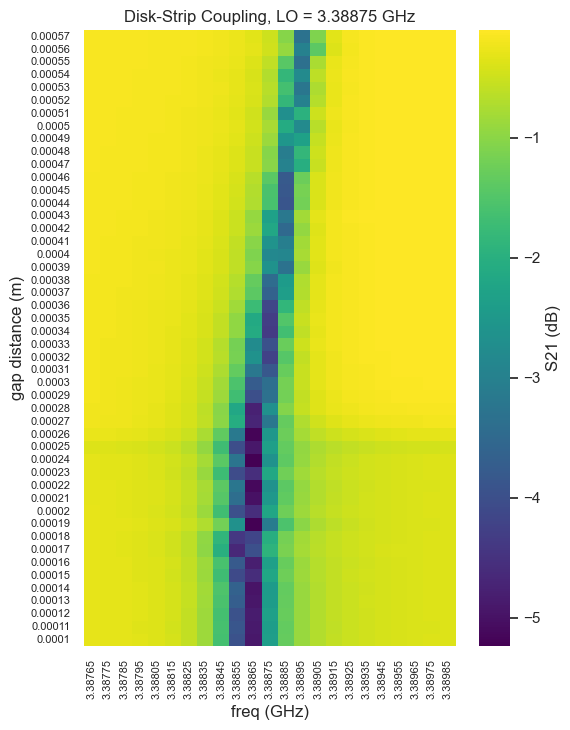

In [185]:
map_setup_updated = p1p57_LN2.pivot_table(index='% x_strip (m)', columns='freq (GHz)', values='S21 (1)').sort_index(ascending=False)
plt.figure(figsize=(6, 8))

# Make heatmap
sns.heatmap(
    map_setup_updated,
    cmap='viridis',      # or 'coolwarm', 'plasma', etc.
    cbar_kws={'label': 'S21 (dB)'},
    xticklabels=1,      # Control how many frequency ticks to show
    yticklabels=1,      # Control how many x_strip ticks to show
)

plt.tick_params(axis='both', labelsize=8)
plt.ylabel('gap distance (m)')
plt.title('Disk-Strip Coupling, LO = 3.38875 GHz')

In [173]:
sns.heatmap?

Signature:
sns.heatmap(
    data,
    *,
    vmin=None,
    vmax=None,
    cmap=None,
    center=None,
    robust=False,
    annot=None,
    fmt='.2g',
    annot_kws=None,
    linewidths=0,
    linecolor='white',
    cbar=True,
    cbar_kws=None,
    cbar_ax=None,
    square=False,
    xticklabels='auto',
    yticklabels='auto',
    mask=None,
    ax=None,
    **kwargs,
)
Docstring:
Plot rectangular data as a color-encoded matrix.

This is an Axes-level function and will draw the heatmap into the
currently-active Axes if none is provided to the ``ax`` argument.  Part of
this Axes space will be taken and used to plot a colormap, unless ``cbar``
is False or a separate Axes is provided to ``cbar_ax``.

Parameters
----------
data : rectangular dataset
    2D dataset that can be coerced into an ndarray. If a Pandas DataFrame
    is provided, the index/column information will be used to label the
    columns and rows.
vmin, vmax : floats, optional
    Values to anchor the colormap, otherwise

Text(0.5, 1.0, 'Disk-Strip Coupling, LO = 3.38875 GHz')

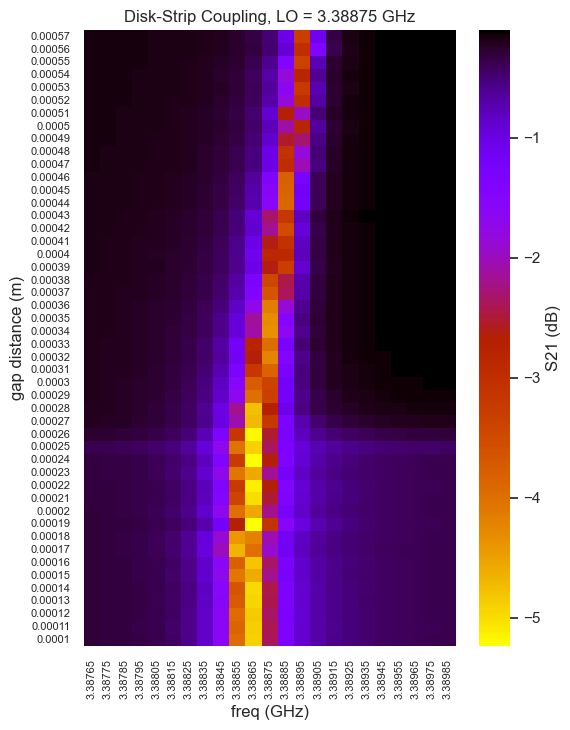

In [177]:
plt.figure(figsize=(6, 8))

# Make heatmap
sns.heatmap(
    map_setup_updated,
    cmap='gnuplot_r',      # or 'coolwarm', 'plasma', etc.
    cbar_kws={'label': 'S21 (dB)'},
    xticklabels=1,      # Control how many frequency ticks to show
    yticklabels=1,      # Control how many x_strip ticks to show
)

plt.tick_params(axis='both', labelsize=8)
plt.ylabel('gap distance (m)')
plt.title('Disk-Strip Coupling, LO = 3.38875 GHz')

Text(0.5, 1.0, 'Disk-Strip Coupling, LO = 3.38875 GHz')

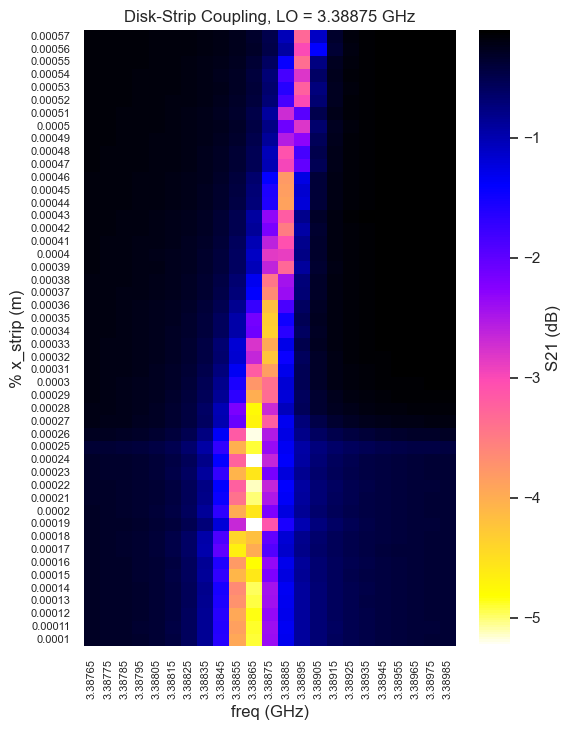

In [168]:
plt.figure(figsize=(6, 8))

# Make heatmap
sns.heatmap(
    map_setup_updated,
    cmap='gnuplot2_r',      # or 'coolwarm', 'plasma', etc.
    cbar_kws={'label': 'S21 (dB)'},
    xticklabels=1,      # Control how many frequency ticks to show
    yticklabels=1,      # Control how many x_strip ticks to show
)

plt.tick_params(axis='both', labelsize=8)
plt.title('Disk-Strip Coupling, LO = 3.38875 GHz')

Text(0.5, 1.0, 'Disk-Strip Coupling, LO = 3.38875 GHz')

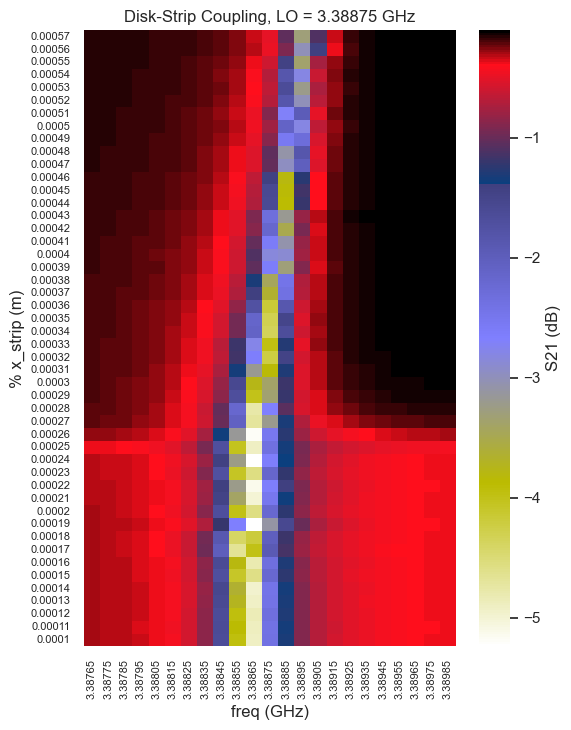

In [172]:
plt.figure(figsize=(6, 8))
# Make heatmap
sns.heatmap(
    map_setup_updated,
    cmap='gist_stern_r',      # or 'coolwarm', 'plasma', etc.
    cbar_kws={'label': 'S21 (dB)'},
    xticklabels=1,      # Control how many frequency ticks to show
    yticklabels=1,      # Control how many x_strip ticks to show
)

plt.tick_params(axis='both', labelsize=8)
plt.title('Disk-Strip Coupling, LO = 3.38875 GHz')

### Now out to 1.11 mm 

In [214]:
# loading in 0.5 to 0.57 mm set
p58_1p103_LN2 = pd.read_csv('/Users/leayamashiro/AliCPT/whispering_gallery/S21_csvs/S11_S21_real/REAL_0.58to1.03mm_GapSweep_LN2_tanDel0_3.3875GHz.csv', skiprows=4)
p58_1p103_LN2[['% x_strip (m)', 'freq (GHz)']] = p58_1p103_LN2[['% x_strip (m)', 'freq (GHz)']].round(6)

LN2_1p04_1p10 = pd.read_csv('/Users/leayamashiro/AliCPT/whispering_gallery/S21_csvs/S11_S21_real/REAL_1.04to1.11mm_GapSweep_LN2_tanDel0_3.3875GHz.csv', skiprows=4)
LN2_1p04_1p10[['% x_strip (m)', 'freq (GHz)']] = LN2_1p04_1p10[['% x_strip (m)', 'freq (GHz)']].round(6)

LN2_1p11_1p19 = pd.read_csv('/Users/leayamashiro/AliCPT/whispering_gallery/S21_csvs/S11_S21_real/REAL_1.11to1.19mm_GapSweep_LN2_tanDel0_3.3875GHz.csv', skiprows=4)
LN2_1p11_1p19[['% x_strip (m)', 'freq (GHz)']] = LN2_1p11_1p19[['% x_strip (m)', 'freq (GHz)']].round(6)
LN2_1p11_1p19 = LN2_1p11_1p19[LN2_1p11_1p19['% x_strip (m)']> 0.00110]
print(LN2_1p11_1p19)

LN2_1p2_1p35 = pd.read_csv('/Users/leayamashiro/AliCPT/whispering_gallery/S21_csvs/S11_S21_real/REAL_1.2to1.35_GapSweep_LN2_tanDel0_3.3875GHz.csv', skiprows=4)
LN2_1p2_1p35[['% x_strip (m)', 'freq (GHz)']] = LN2_1p2_1p35[['% x_strip (m)', 'freq (GHz)']].round(6)

     % x_strip (m)  freq (GHz)    S11 (1)   S21 (1)
23         0.00111     3.38765 -21.006630 -0.129318
24         0.00111     3.38775 -20.955429 -0.130245
25         0.00111     3.38785 -20.896600 -0.131347
26         0.00111     3.38795 -20.828895 -0.132650
27         0.00111     3.38805 -20.749907 -0.134221
..             ...         ...        ...       ...
225        0.00119     3.38945 -29.501725 -0.137138
226        0.00119     3.38955 -26.625880 -0.115812
227        0.00119     3.38965 -25.345711 -0.109361
228        0.00119     3.38975 -24.621426 -0.107242
229        0.00119     3.38985 -24.155687 -0.106680

[207 rows x 4 columns]


In [204]:
LN2_1p04_1p11

,% x_strip (m),freq (GHz),S11 (1),S21 (1)
0,0.00104,3.38765,-21.401674,-0.129054
1,0.00104,3.38775,-21.342846,-0.130067
2,0.00104,3.38785,-21.275277,-0.131272
3,0.00104,3.38795,-21.197298,-0.132705
4,0.00104,3.38805,-21.106236,-0.134444
...,...,...,...,...
156,0.00110,3.38945,-29.339970,-0.131934
157,0.00110,3.38955,-26.785519,-0.115455
158,0.00110,3.38965,-25.573473,-0.110101
159,0.00110,3.38975,-24.864543,-0.108295


In [206]:
p58_1p103_LN2[p58_1p103_LN2['% x_strip (m)']==0.00058]

print(len(p5p57_LN2[p5p57_LN2['% x_strip (m)']==0.00050]) == len(p58_1p103_LN2[p58_1p103_LN2['% x_strip (m)']==0.00058]))
print(len(p5p57_LN2[p5p57_LN2['% x_strip (m)']==0.00050]) == len(LN2_1p11_1p19[LN2_1p11_1p19['% x_strip (m)']==0.00118]))

True
True


In [215]:
all_so_far = pd.concat([p1p57_LN2, p58_1p103_LN2, LN2_1p04_1p10, LN2_1p11_1p19, LN2_1p2_1p35])

In [216]:
print(all_so_far)

     % x_strip (m)  freq (GHz)    S11 (1)   S21 (1)
4          0.00010     3.38765 -18.536536 -0.296787
5          0.00010     3.38775 -19.074563 -0.306071
6          0.00010     3.38785 -19.791810 -0.320148
7          0.00010     3.38795 -20.789904 -0.342347
8          0.00010     3.38805 -22.245941 -0.379203
..             ...         ...        ...       ...
363        0.00135     3.38945 -35.760034 -0.133728
364        0.00135     3.38955 -30.678772 -0.107537
365        0.00135     3.38965 -28.760234 -0.099551
366        0.00135     3.38975 -27.752037 -0.096649
367        0.00135     3.38985 -27.128887 -0.095549

[2921 rows x 4 columns]


In [217]:
map_setup_all = all_so_far.pivot_table(index='% x_strip (m)', columns='freq (GHz)', values='S21 (1)').sort_index(ascending=False)

Text(0.5, 1.0, 'Disk-Strip Coupling, LO = 3.38875 GHz')

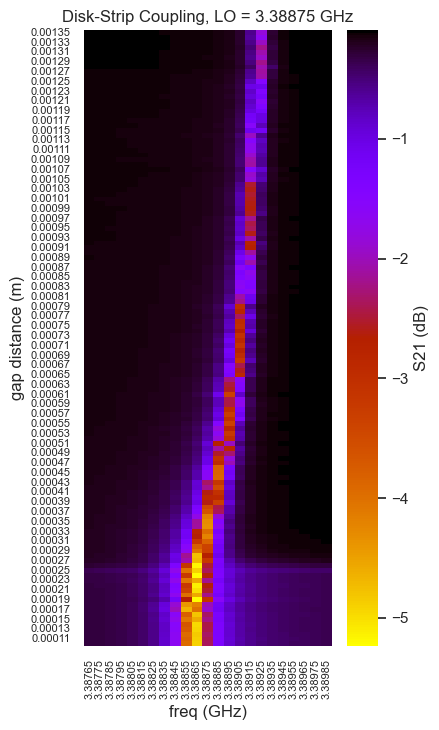

In [218]:
plt.figure(figsize=(4, 8))

# Make heatmap
sns.heatmap(
    map_setup_all,
    cmap='gnuplot_r',      # or 'coolwarm', 'plasma', etc.
    cbar_kws={'label': 'S21 (dB)'},
    xticklabels=1,      # Control how many frequency ticks to show
    yticklabels=2,      # Control how many x_strip ticks to show
)

plt.tick_params(axis='both', labelsize=8)
plt.ylabel('gap distance (m)')
plt.title('Disk-Strip Coupling, LO = 3.38875 GHz')

### Okay now with complete set from x_strip = 0

In [219]:
LN2_0_0p09 = pd.read_csv('/Users/leayamashiro/AliCPT/whispering_gallery/S21_csvs/S11_S21_real/REAL_LN2_0to0.1_GapSweep_3.3885GHz.csv', skiprows=4)
LN2_0_0p09[['% x_strip (m)', 'freq (GHz)']] = LN2_0_0p09[['% x_strip (m)', 'freq (GHz)']].round(6)

In [220]:
all_0to1p35 = pd.concat([LN2_0_0p09, p1p57_LN2, p58_1p103_LN2, LN2_1p04_1p10, LN2_1p11_1p19, LN2_1p2_1p35])

In [224]:
all_0to1p35

,% x_strip (m),freq (GHz),S11 (1),S21 (1)
0,0.00000,3.38765,-25.616749,-0.067758
1,0.00000,3.38775,-25.617681,-0.067763
2,0.00000,3.38785,-25.618542,-0.067757
3,0.00000,3.38795,-25.619349,-0.067756
4,0.00000,3.38805,-25.620146,-0.067753
...,...,...,...,...
363,0.00135,3.38945,-35.760034,-0.133728
364,0.00135,3.38955,-30.678772,-0.107537
365,0.00135,3.38965,-28.760234,-0.099551
366,0.00135,3.38975,-27.752037,-0.096649


In [227]:
setup_all = all_0to1p35.pivot_table(index='% x_strip (m)', columns='freq (GHz)', values='S21 (1)').sort_index(ascending=False)
setup_0to0p1 = LN2_0_0p09.pivot_table(index='% x_strip (m)', columns='freq (GHz)', values='S21 (1)').sort_index(ascending=True)

Text(0.5, 1.0, 'Disk-Strip Coupling, LO = 3.38875 GHz')

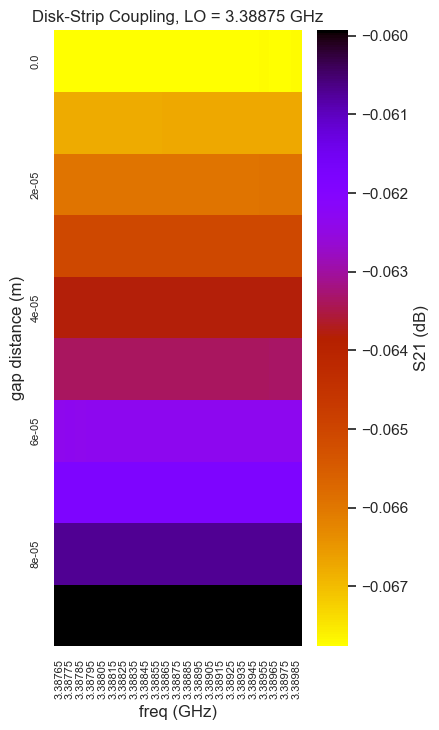

In [228]:
plt.figure(figsize=(4, 8))

# Make heatmap
sns.heatmap(
    setup_0to0p1,
    cmap='gnuplot_r',      # or 'coolwarm', 'plasma', etc.
    cbar_kws={'label': 'S21 (dB)'},
    xticklabels=1,      # Control how many frequency ticks to show
    yticklabels=2,      # Control how many x_strip ticks to show
)

plt.tick_params(axis='both', labelsize=8)
plt.ylabel('gap distance (m)')
plt.title('Disk-Strip Coupling, LO = 3.38875 GHz')

Text(0.5, 1.0, 'Disk-Strip Coupling, LO = 3.38875 GHz')

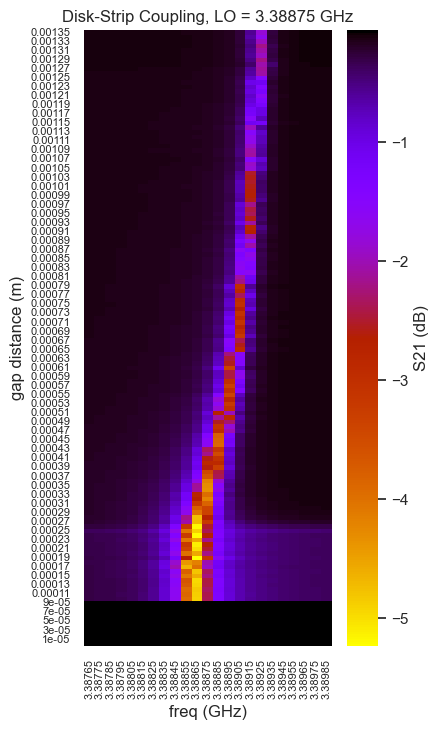

In [223]:
plt.figure(figsize=(4, 8))

# Make heatmap
sns.heatmap(
    setup_all,
    cmap='gnuplot_r',      # or 'coolwarm', 'plasma', etc.
    cbar_kws={'label': 'S21 (dB)'},
    xticklabels=1,      # Control how many frequency ticks to show
    yticklabels=2,      # Control how many x_strip ticks to show
)

plt.tick_params(axis='both', labelsize=8)
plt.ylabel('gap distance (m)')
plt.title('Disk-Strip Coupling, LO = 3.38875 GHz')